# FP Growth

## Introduction

In this tutorial, we will be learning about the FP Growth algorithm. It is used for Association rule mining and Market Basket Analysis.

Frequent Itemset Mining and Basket Analysis - The process of identifying the frequently occurring product combinations in order to recommend or to rearrange items in both online and offline shopping. 

For example, if we know that customers who buy milk also buy yoghurt, we can promote the yoghurt to increase the sales. Your amazon recommendations like "Frequently bought together" is on of the finest examples.

Please find the link below for the tutorial on FP Growth by manual calculation  - https://www.geeksforgeeks.org/ml-frequent-pattern-growth-algorithm/

Some important terms

 Support - Support says how popular an itemset is,  which is measured by the proportion of transactions in which an itemset appears.

Confidence - How likely item Y is purchased when item X is purchased, expressed as {X → Y}.

Lift -  How likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. When lift > 1 then the rule is better at predicting the result than guessing where as when lift < 1, the rule is doing worse than informed guessing.

Let's now use a dataset and make the market basket analysis and run FP growth algorithm in python

## Install packages

In [ ]:
!pip install mlxtend

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Importing libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

## Loading data

Now we will load the real transactional bakery data and calculate the product association rules and see how we can consume the output.

This dataset is created on the basis of transactions that have happened in "The Bakery" at C4C, CU Boulder. 

In [ ]:
# Load the dataset
df = pd.read_csv('bakery_data.csv')

In [ ]:
df.head()

,TransactionId,Transaction
0,0,"ham cheese croissant,Sherpa Chai"
1,1,"ham cheese croissant,chocochip cookie"
2,2,"chocochip cookie,ham cheese croissant"
3,3,"banana bread,Sherpa Chai"
4,4,"lemonade,ham cheese croissant"


## Preprocessing data

Change the data frame's column names and the data to lowercase

In [ ]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [ ]:
# Summary of variables and the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionId  298 non-null    int64 
 1   Transaction    298 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


Let's check on some null values if any.

In [ ]:
df.isnull().sum()

TransactionId    0
Transaction      0
dtype: int64

In [ ]:
df['TransactionId'].value_counts()

0      1
204    1
202    1
201    1
200    1
      ..
99     1
98     1
97     1
96     1
297    1
Name: TransactionId, Length: 298, dtype: int64

Getting the list of transactions

Let's now create a list of items for each transaction that can be used as training set to create association rules.

One-hot encoding transaction data

We need to convert the categorical data to numerical data to generate the rules. Hence we apply one hot encoding. Learn more about one hot encoding at - https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/ 

For one One-hot-encoding using TransactionEncoder refer - https://www.anycodings.com/questions/one-hot-encoding-using-transactionencoder-for-lists-with-different-number-of-elements

In [ ]:
def onehot_encoding_transactions(transactions_column):
    transactions = transactions_column.apply(lambda t: str(t).split(','))
    encoder = TransactionEncoder().fit(transactions)
    onehot = encoder.transform(transactions)
    onehot = pd.DataFrame(onehot, columns = encoder.columns_)
    return onehot

onehotencoded_bakery = onehot_encoding_transactions(df['Transaction'])
onehotencoded_bakery

,banana bread,chocochip cookie,cookie,ham cheese croissant,ice mocha,lemonade,sherpa chai
0,False,False,False,True,False,False,True
1,False,True,False,True,False,False,False
2,False,True,False,True,False,False,False
3,True,False,False,False,False,False,True
4,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...
293,False,True,False,False,True,True,True
294,True,True,False,True,False,True,False
295,False,True,True,True,False,True,False
296,True,False,True,True,True,False,False


## Ready to run

Run the FP-growth algorithm

Let's now generate association rules using FP-growth algorithm.

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
# Compute frequent items using the FP-growth algorithm
frequent_itemsets = fpgrowth(onehotencoded_bakery, min_support = 0.05, use_colnames = True)
frequent_itemsets.sort_values('support', ascending = False)

,support,itemsets
0,0.402685,(ham cheese croissant)
6,0.399329,(ice mocha)
4,0.395973,(lemonade)
2,0.379195,(chocochip cookie)
1,0.375839,(sherpa chai)
5,0.345638,(cookie)
3,0.328859,(banana bread)
14,0.157718,"(chocochip cookie, ice mocha)"
9,0.144295,"(sherpa chai, ice mocha)"
10,0.137584,"(chocochip cookie, sherpa chai)"


Let's now see the frequent itemsets

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.402685,(ham cheese croissant),1
1,0.375839,(sherpa chai),1
2,0.379195,(chocochip cookie),1
3,0.328859,(banana bread),1
4,0.395973,(lemonade),1
5,0.345638,(cookie),1
6,0.399329,(ice mocha),1
7,0.110738,"(sherpa chai, ham cheese croissant)",2
8,0.127517,"(sherpa chai, lemonade)",2
9,0.144295,"(sherpa chai, ice mocha)",2


Let's now see itemsets with single and multiple items using value_counts()

In [ ]:
frequent_itemsets['length'].value_counts()

2    21
1     7
3     1
Name: length, dtype: int64

Calculate association rules

In [ ]:
from mlxtend.frequent_patterns import association_rules
# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(chocochip cookie, sherpa chai)",(ice mocha),0.137584,0.399329,0.067114,0.487805,1.221562,0.012173,1.172739
1,"(ice mocha, sherpa chai)",(chocochip cookie),0.144295,0.379195,0.067114,0.465116,1.226590,0.012398,1.160636
2,"(chocochip cookie, ice mocha)",(sherpa chai),0.157718,0.375839,0.067114,0.425532,1.132219,0.007837,1.086503
3,(sherpa chai),"(chocochip cookie, ice mocha)",0.375839,0.157718,0.067114,0.178571,1.132219,0.007837,1.025387
4,(chocochip cookie),"(ice mocha, sherpa chai)",0.379195,0.144295,0.067114,0.176991,1.226590,0.012398,1.039727
5,(ice mocha),"(chocochip cookie, sherpa chai)",0.399329,0.137584,0.067114,0.168067,1.221562,0.012173,1.036642
6,(chocochip cookie),(ice mocha),0.379195,0.399329,0.157718,0.415929,1.041571,0.006295,1.028422
7,(ice mocha),(chocochip cookie),0.399329,0.379195,0.157718,0.394958,1.041571,0.006295,1.026053


The rule of "sherpa chai,chocochip cookie and ice mocha" has the highest confidence level (48..7%). The link between herpa chai,chocochip cookie and ice mocha just be a coincidence since both goods are commonly seen in all transactions (see frequent itemsets). Lift exceeds 1.0. This does give us a high degree of confidence on the association rule we suggested.

Interesting Read - https://www.linkedin.com/pulse/market-basket-analysis-why-lift-odd-metric-nadamuni-ramesh/

Let's see the application side now i.e bundling with the help of a heatmap.

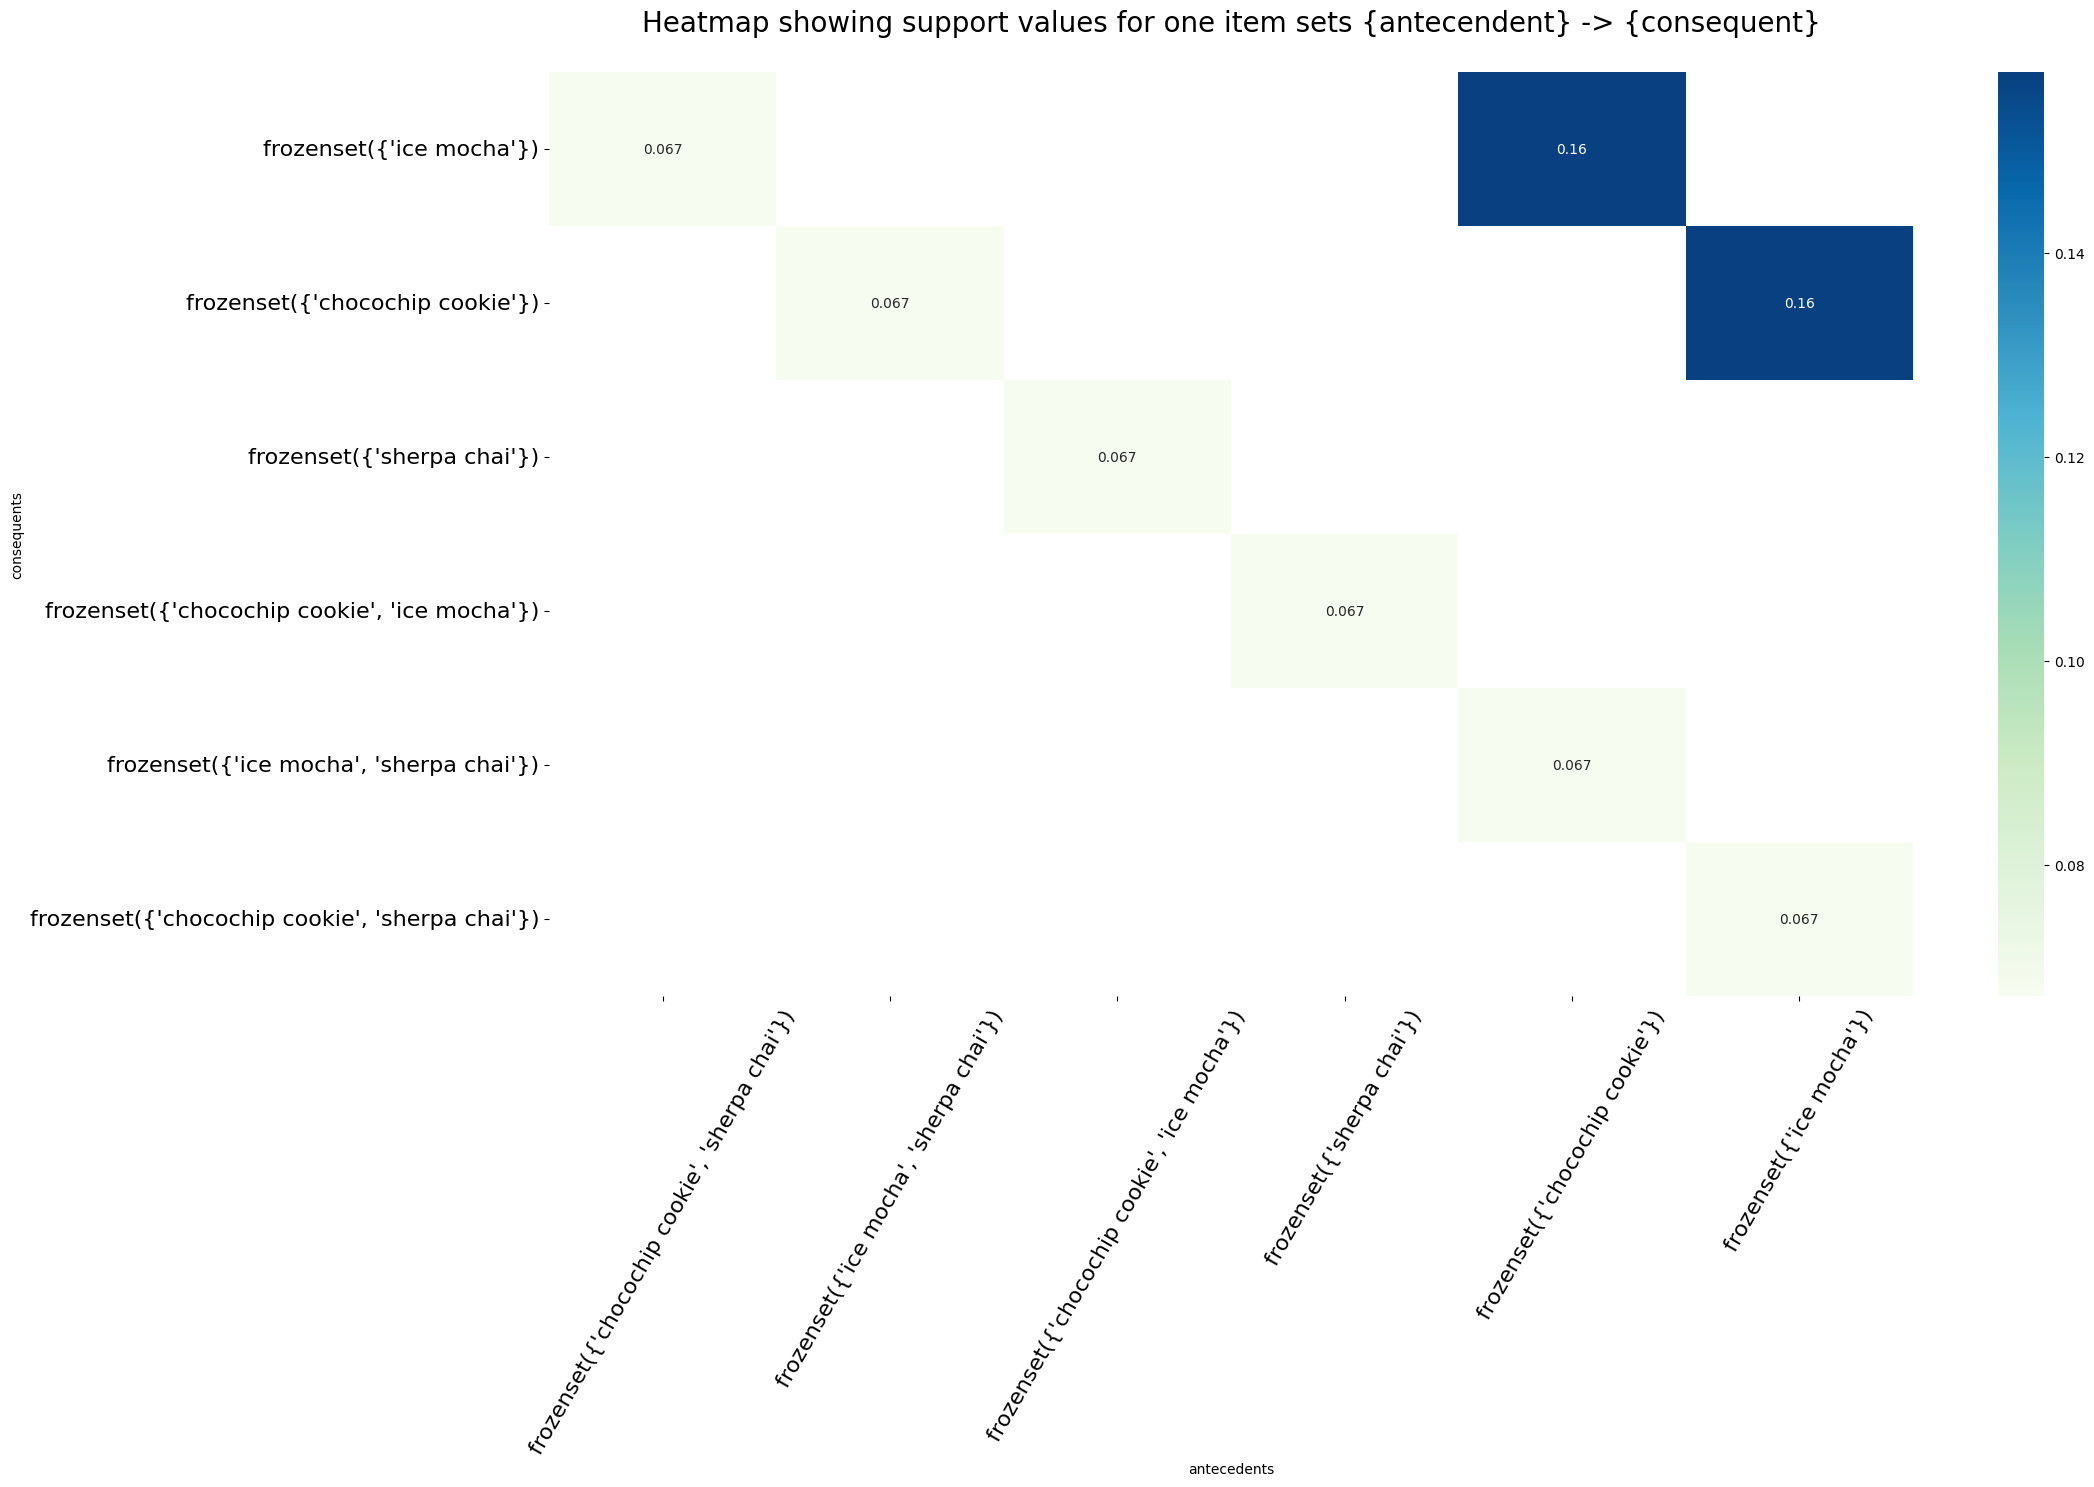

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Transform data to matrix format and generate heatmap
pivot = rules.pivot(index='consequents', columns='antecedents', values='support')
# sns.heatmap(pivot)

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(22,12))
plt.title("Heatmap showing support values for one item sets {antecendent} -> {consequent}\n", size = 20)
sns.heatmap(pivot, annot = True, cbar = True, cmap='GnBu')

# Format and display plot
plt.yticks(rotation=0, size = 16)
plt.xticks(rotation=60, size = 16)
plt.show()

The heatmap above shows values of support for the association rules. Darker the color, higher the intensity. We can see the high support for the association rule {Ice mocha -> choco chip cookie} and vice-versa. Hence we can bundle these two and sell together! 

## Congratulations!

FP Growth Algorithm by Ajay Sadananda is licensed under [CC BY NC SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).